# Multiple ROC-AUC in one plot

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

## All 45 Features

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251
df1 = pd.read_csv('Feats45_Categ.csv')
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251
(251, 46)


,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,2,1,2
1,0,0,1,0,0,1,0,0,1,1,...,0,2,1,0,0,0,1,0,0,2


In [3]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male
df2 = pd.read_csv('Feats45_CategAge_APPRDX_Male_Edit.csv')
df2 = df2.drop(['PATNO'], axis=1)
df2['APPRDX'] = df2['APPRDX'] -1
print(df2.shape)
df2.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male
(167, 46)


,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,1,0,0,1,0,0,1,1,...,0,2,1,0,0,0,1,0,0,2
1,0,0,0,0,1,0,0,0,1,2,...,0,2,1,0,0,0,1,1,1,0


In [4]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female
df3 = pd.read_csv('Feats45_CategAge_APPRDX_Female_Edit.csv')
df3 = df3.drop(['PATNO'], axis=1)
df3['APPRDX'] = df3['APPRDX'] -1
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female
(84, 46)


,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,2,1,2
1,0,0,0,1,0,0,0,0,1,2,...,0,1,0,0,1,1,2,2,1,1


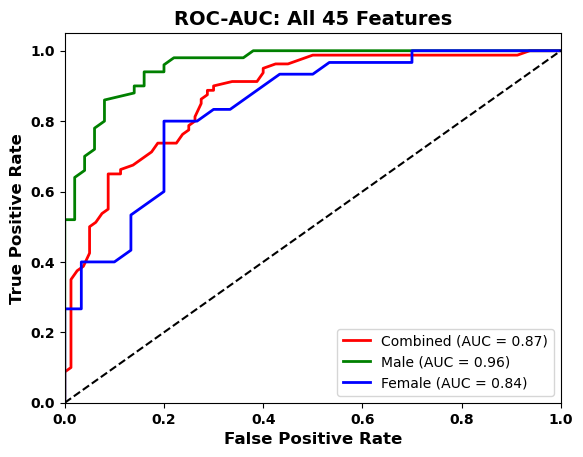

In [5]:
# First DataFrame
dataset1 = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X1 = dataset1.iloc[:, 1:].values
y1 = dataset1.iloc[:, 0].values
classifier1 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob1 = cross_val_predict(classifier1, X1, y1, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr1, tpr1, thresholds1 = roc_curve(y1, y_prob1[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc1 = auc(fpr1, tpr1)

# Second DataFrame
dataset2 = df2.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X2 = dataset2.iloc[:, 1:].values
y2 = dataset2.iloc[:, 0].values
classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob2 = cross_val_predict(classifier2, X2, y2, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr2, tpr2, thresholds2 = roc_curve(y2, y_prob2[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc2 = auc(fpr2, tpr2)

# Third DataFrame
dataset3 = df3.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X3 = dataset3.iloc[:, 1:].values
y3 = dataset3.iloc[:, 0].values
classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob3 = cross_val_predict(classifier3, X3, y3, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr3, tpr3, thresholds3 = roc_curve(y3, y_prob3[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curves for all three dataframes in a single plot
plt.plot(fpr1, tpr1, color='r', lw=2, label='Combined (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='Male (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='Female (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: All 45 Features', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45Feats_All3.svg')
plt.savefig('ROC_AUC_All45Feats_All3.pdf')

# Show the plot
plt.show()

In [6]:
# First DataFrame
tn1, fp1, fn1, tp1 = confusion_matrix(y1, np.argmax(y_prob1, axis=1)).ravel()
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
balanced_accuracy1 = (sensitivity1 + specificity1) / 2

#Second DataFrame
tn2, fp2, fn2, tp2 = confusion_matrix(y2, np.argmax(y_prob2, axis=1)).ravel()
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)
balanced_accuracy2 = (sensitivity2 + specificity2) / 2

#Third DataFrame
tn3, fp3, fn3, tp3 = confusion_matrix(y3, np.argmax(y_prob3, axis=1)).ravel()
sensitivity3 = tp3 / (tp3 + fn3)
specificity3 = tn3 / (tn3 + fp3)
balanced_accuracy3 = (sensitivity3 + specificity3) / 2

data = {
    'Combined': [sensitivity1, specificity1, balanced_accuracy1],
    'Male': [sensitivity2, specificity2, balanced_accuracy2],
    'Female': [sensitivity3, specificity3, balanced_accuracy3]
}
results_df = pd.DataFrame(data, index=['Sensitivity', 'Specificity', 'Balanced Accuracy'])

results_df.to_csv('Table_All45Feats_All3.csv')
results_df.head()

,Combined,Male,Female
Sensitivity,0.7625,0.88,0.766667
Specificity,0.7625,0.86,0.800000
Balanced Accuracy,0.7625,0.87,0.783333


# Create a list of colors for each dataset
colors = ['r', 'g', 'b']

# Define the names for each dataset in the legend
dataset_names = ['Combined', 'Male', 'Female']

# Loop over the datasets and plot the ROC curves
for i, dataset in enumerate([df1, df2, df3]):
    # Sample the data
    if i == 0:
        dataset_sampled = dataset.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
    elif i == 1:
        dataset_sampled = dataset.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
    else:
        dataset_sampled = dataset.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
    
    X = dataset_sampled.iloc[:, 1:].values
    y = dataset_sampled.iloc[:, 0].values

    # Fit the model
    classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
    y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

    # Calculate the false positive rate and true positive rate for different thresholds
    fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

    # Calculate the area under the ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve with the updated legend label
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='%s (AUC = %0.2f)' % (dataset_names[i], roc_auc))

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')

# Set the plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: All 45 Features', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45Features.svg')
plt.savefig('ROC_AUC_All45Features.pdf')

# Show the plot
plt.show()


## Decision Tree Features

In [7]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251
df1 = pd.read_csv('DecTree_All45Feats_Data.csv')
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251
(251, 6)


,APPRDX,UPSIT,Trail_Making_B,MDSP_Fatigue,Montreal_Cognitive,Symbol_Digit
0,0,2,1,1,0,1
1,0,2,0,1,0,1


In [8]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male
df2 = pd.read_csv('DecTree_All45Feats_Data_Male.csv')
df2['APPRDX'] = df2['APPRDX'] -1
print(df2.shape)
df2.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male
(167, 6)


,APPRDX,UPSIT,Symbol_Digit,Trail_Making_B,MDSP_Fatigue,MDS_Apathy
0,0,2,1,0,1,1
1,0,0,1,1,0,0


In [9]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female
df3 = pd.read_csv('DecTree_All45Feats_Data_Female.csv')
df3 = df3.drop(['PATNO'], axis=1)
df3['APPRDX'] = df3['APPRDX'] -1
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female
(84, 6)


,APPRDX,UPSIT,MDSP_Constipate,Trail_Making_B,MDSP_Pain,Montreal_Cognitive
0,0,2,1,1,1,0
1,0,1,0,1,1,0


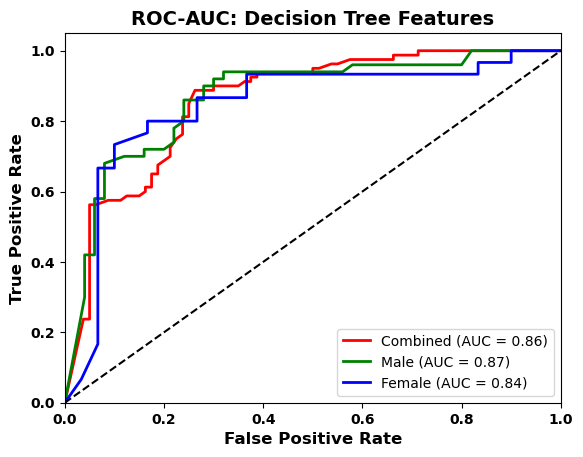

In [10]:
# First DataFrame
dataset1 = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X1 = dataset1.iloc[:, 1:].values
y1 = dataset1.iloc[:, 0].values
classifier1 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob1 = cross_val_predict(classifier1, X1, y1, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr1, tpr1, thresholds1 = roc_curve(y1, y_prob1[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc1 = auc(fpr1, tpr1)

# Second DataFrame
dataset2 = df2.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X2 = dataset2.iloc[:, 1:].values
y2 = dataset2.iloc[:, 0].values
classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob2 = cross_val_predict(classifier2, X2, y2, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr2, tpr2, thresholds2 = roc_curve(y2, y_prob2[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc2 = auc(fpr2, tpr2)

# Third DataFrame
dataset3 = df3.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X3 = dataset3.iloc[:, 1:].values
y3 = dataset3.iloc[:, 0].values
classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob3 = cross_val_predict(classifier3, X3, y3, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr3, tpr3, thresholds3 = roc_curve(y3, y_prob3[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curves for all three dataframes in a single plot
plt.plot(fpr1, tpr1, color='r', lw=2, label='Combined (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='Male (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='Female (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: Decision Tree Features', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and PDF files
plt.savefig('ROC_AUC_DecTree_All3.svg')
plt.savefig('ROC_AUC_DecTree_All3.pdf')

# Show the plot
plt.show()

In [11]:
# First DataFrame
tn1, fp1, fn1, tp1 = confusion_matrix(y1, np.argmax(y_prob1, axis=1)).ravel()
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
balanced_accuracy1 = (sensitivity1 + specificity1) / 2

#Second DataFrame
tn2, fp2, fn2, tp2 = confusion_matrix(y2, np.argmax(y_prob2, axis=1)).ravel()
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)
balanced_accuracy2 = (sensitivity2 + specificity2) / 2

#Third DataFrame
tn3, fp3, fn3, tp3 = confusion_matrix(y3, np.argmax(y_prob3, axis=1)).ravel()
sensitivity3 = tp3 / (tp3 + fn3)
specificity3 = tn3 / (tn3 + fp3)
balanced_accuracy3 = (sensitivity3 + specificity3) / 2

data = {
    'Combined': [sensitivity1, specificity1, balanced_accuracy1],
    'Male': [sensitivity2, specificity2, balanced_accuracy2],
    'Female': [sensitivity3, specificity3, balanced_accuracy3]
}
results_df = pd.DataFrame(data, index=['Sensitivity', 'Specificity', 'Balanced Accuracy'])

results_df.to_csv('Table_DecTree_All3.csv')
results_df.head()

,Combined,Male,Female
Sensitivity,0.8875,0.82,0.800000
Specificity,0.7375,0.76,0.766667
Balanced Accuracy,0.8125,0.79,0.783333


#fit logistic regression model and plot ROC curve
df1 = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
df2 = df2.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
df3 = df3.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))

X1 = df1.iloc[:, 1:].values
y1 = df1.iloc[:, 0].values
X2 = df2.iloc[:, 1:].values
y2 = df2.iloc[:, 0].values
X3 = df3.iloc[:, 1:].values
y3 = df3.iloc[:, 0].values


    # Fit the model
classifier1 = RandomForestClassifier(n_estimators=100, criterion='gini')
y1_prob = cross_val_predict(classifier1, X1, y1, cv=10, method='predict_proba')
classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini')
y2_prob = cross_val_predict(classifier2, X2, y2, cv=10, method='predict_proba')
classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini')
y3_prob = cross_val_predict(classifier3, X3, y3, cv=10, method='predict_proba')


"""
X1 = df1.iloc[:, 1:].values
y1 = df1.iloc[:, 0].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

X2 = df2.iloc[:, 1:].values
y2 = df2.iloc[:, 0].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

X3 = df3.iloc[:, 1:].values
y3 = df3.iloc[:, 0].values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 1)

rf1 = RandomForestClassifier(n_estimators=100, criterion='gini')
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini')
rf3 = RandomForestClassifier(n_estimators=100, criterion='gini')

rf1.fit(X1_train, y1_train)
rf2.fit(X2_train, y2_train)
rf3.fit(X3_train, y3_train)


# Calculate ROC curve and AUC for combined dataset
fpr_comb, tpr_comb, _ = roc_curve(y1_test, rf1.predict(X1_test))
auc_comb = auc(fpr_comb, tpr_comb)

# Calculate ROC curve and AUC for male dataset
fpr_male, tpr_male, _ = roc_curve(y2_test, rf2.predict(X2_test))
auc_male = auc(fpr_male, tpr_male)

# Calculate ROC curve and AUC for female dataset
fpr_female, tpr_female, _ = roc_curve(y3_test, rf3.predict(X3_test))
auc_female = auc(fpr_female, tpr_female)
"""

fpr_comb, tpr_comb, thresholds = roc_curve(y1, y1_prob[:, 1], pos_label=1)
roc_1 = auc(fpr_comb, tpr_comb)
fpr_male, tpr_male, thresholds = roc_curve(y2, y2_prob[:, 1], pos_label=1)
roc_2 = auc(fpr_male, tpr_male)
fpr_female, tpr_female, thresholds = roc_curve(y3, y3_prob[:, 1], pos_label=1)
roc_3 = auc(fpr_female, tpr_female)


ax=plt.gca()
RocCurveDisplay.from_estimator(classifier1,X1,y1,ax=ax, name="Combined", color = "r")
RocCurveDisplay.from_estimator(classifier2,X2,y2,ax=ax, name= "Male", color = "g")
RocCurveDisplay.from_estimator(classifier3,X3,y3,ax=ax, name= "Female", color = "b")

# Plot reference line for random classifier
plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--')

# Set axis limits and labels
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('ROC-AUC: Decision Tree Features', fontweight='bold', fontsize=14)

# Add legend and show plot
plt.legend(loc="lower right")
plt.show()


## Random forest Features

In [12]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251
df1 = pd.read_csv('RanFor_All45Feats_Data.csv')
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251
(251, 11)


,APPRDX,UPSIT,MDSP_Fatigue,Symbol_Digit,Trail_Making_B,Montreal_Cognitive,Lexical_Fluency,LetterNumber,REM_Dream,SCOPA_Sex,Modif_Boston
0,0,2,1,1,1,0,1,1,2,1,1
1,0,2,1,1,0,0,1,1,2,0,1


In [13]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male
df2 = pd.read_csv('RanFor_All45Feats_Data_Male.csv')
df2['APPRDX'] = df2['APPRDX'] -1
print(df2.shape)
df2.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male
(167, 11)


,APPRDX,UPSIT,Symbol_Digit,MDSP_Fatigue,Trail_Making_B,REM_Dream,MDSP_Pain,Geriatric_Depression,SCOPA_Sex,MDSP_SleepDay,MDSP_SleepNight
0,0,2,1,1,0,2,1,1,0,1,2
1,0,0,1,0,1,0,0,0,0,1,0


In [14]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female
df3 = pd.read_csv('RanFor_All45Feats_Data_Female.csv')
df3 = df3.drop(['PATNO'], axis=1)
df3['APPRDX'] = df3['APPRDX'] -1
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female
(84, 11)


,APPRDX,UPSIT,Montreal_Cognitive,MDSP_Pain,Semantic,Benton,SCOPA_Thermo,SCOPA_Sex,LetterNumber,MDSP_Constipate,REM_Dream
0,0,2,0,1,0,0,1,1,1,1,2
1,0,1,0,1,1,0,1,0,1,0,1


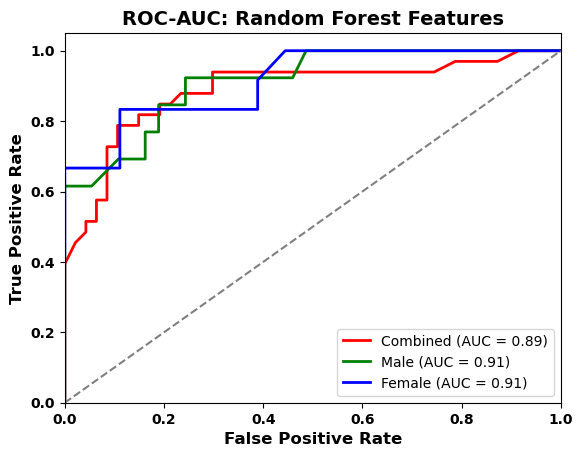

In [15]:
# Define a function to prepare the data and generate ROC curve for each dataframe
def generate_roc_auc(df, sample_size):
    # Subset the dataframe based on sample size
    dataset = df.sample(sample_size, random_state=1)
    # Separate features and target variable
    X = dataset.iloc[:, 1:].values
    y = dataset.iloc[:, 0].values
    # Create classifier object
    classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
    # Generate predicted probabilities using cross-validation
    y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')
    # Calculate the false positive rate and true positive rate for different thresholds
    fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)
    # Calculate the area under the ROC curve
    roc_auc = auc(fpr, tpr)
    # Return the fpr, tpr, thresholds and roc_auc values
    return fpr, tpr, thresholds, roc_auc


# Generate ROC curve for each dataframe
fpr1, tpr1, thresholds1, roc_auc1 = generate_roc_auc(df1, 80)
fpr2, tpr2, thresholds2, roc_auc2 = generate_roc_auc(df2, 50)
fpr3, tpr3, thresholds3, roc_auc3 = generate_roc_auc(df3, 30)

# Plot the ROC curves for all dataframes in a single plot
plt.plot(fpr1, tpr1, color='r', lw=2, label='Combined (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='Male (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='Female (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Random Forest Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_RanFor_All3.svg')
plt.savefig('ROC_AUC_RanFor_All3.pdf')
plt.show()


In [16]:
# First DataFrame
tn1, fp1, fn1, tp1 = confusion_matrix(y1, np.argmax(y_prob1, axis=1)).ravel()
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
balanced_accuracy1 = (sensitivity1 + specificity1) / 2

#Second DataFrame
tn2, fp2, fn2, tp2 = confusion_matrix(y2, np.argmax(y_prob2, axis=1)).ravel()
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)
balanced_accuracy2 = (sensitivity2 + specificity2) / 2

#Third DataFrame
tn3, fp3, fn3, tp3 = confusion_matrix(y3, np.argmax(y_prob3, axis=1)).ravel()
sensitivity3 = tp3 / (tp3 + fn3)
specificity3 = tn3 / (tn3 + fp3)
balanced_accuracy3 = (sensitivity3 + specificity3) / 2

data = {
    'Combined': [sensitivity1, specificity1, balanced_accuracy1],
    'Male': [sensitivity2, specificity2, balanced_accuracy2],
    'Female': [sensitivity3, specificity3, balanced_accuracy3]
}
results_df = pd.DataFrame(data, index=['Sensitivity', 'Specificity', 'Balanced Accuracy'])

results_df.to_csv('Table_RanFor_All3.csv')
results_df.head()

,Combined,Male,Female
Sensitivity,0.8875,0.82,0.800000
Specificity,0.7375,0.76,0.766667
Balanced Accuracy,0.8125,0.79,0.783333


## Boruta Features

In [17]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251
df1 = pd.read_csv('BorutaR_All45Feats_Data.csv')
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251
(251, 10)


,APPRDX,MDSP_Fatigue,MDS_Apathy,Montreal_Cognitive,REM_Dream,SCOPA_Gastro,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,1,0,0,2,1,1,2,1,2
1,0,1,1,0,2,0,1,0,0,2


In [18]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male
df2 = pd.read_csv('BorutaR_All45Feats_Data_Male.csv')
df2 = df2.drop(['PATNO'], axis=1)
df2['APPRDX'] = df2['APPRDX'] -1
print(df2.shape)
df2.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male
(167, 13)


,APPRDX,Hopkins_Recog,LetterNumber,MDSP_Fatigue,MDS_Depress,MDS_Apathy,Modif_Boston,Montreal_Cognitive,REM_Dream,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,1,1,0,1,1,0,2,1,0,0,2
1,0,0,1,0,0,0,1,0,0,1,1,1,0


In [19]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female
df3 = pd.read_csv('BorutaR_All45Feats_Data_Female.csv')
df3 = df3.drop(['PATNO'], axis=1)
df3['APPRDX'] = df3['APPRDX'] -1
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female
(84, 5)


,APPRDX,MDSP_Constipate,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,0,1,0,1,2
1,0,0,0,1,1


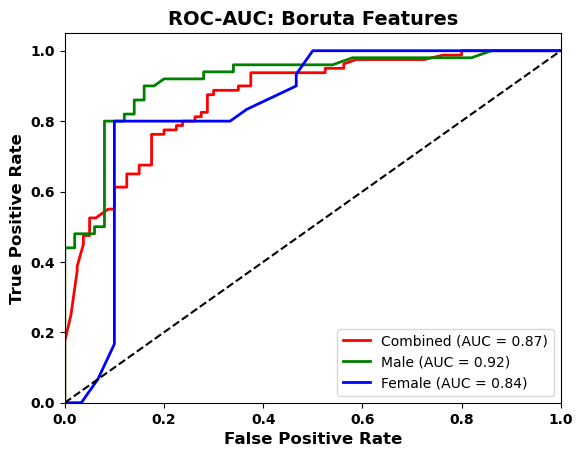

In [20]:
# First DataFrame
dataset1 = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X1 = dataset1.iloc[:, 1:].values
y1 = dataset1.iloc[:, 0].values
classifier1 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob1 = cross_val_predict(classifier1, X1, y1, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr1, tpr1, thresholds1 = roc_curve(y1, y_prob1[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc1 = auc(fpr1, tpr1)

# Second DataFrame
dataset2 = df2.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X2 = dataset2.iloc[:, 1:].values
y2 = dataset2.iloc[:, 0].values
classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob2 = cross_val_predict(classifier2, X2, y2, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr2, tpr2, thresholds2 = roc_curve(y2, y_prob2[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc2 = auc(fpr2, tpr2)

# Third DataFrame
dataset3 = df3.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X3 = dataset3.iloc[:, 1:].values
y3 = dataset3.iloc[:, 0].values
classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob3 = cross_val_predict(classifier3, X3, y3, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr3, tpr3, thresholds3 = roc_curve(y3, y_prob3[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curves for all three dataframes in a single plot
plt.plot(fpr1, tpr1, color='r', lw=2, label='Combined (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='Male (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='Female (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: Boruta Features', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Boruta_All3.svg')
plt.savefig('ROC_AUC_Boruta_All3.pdf')

# Show the plot
plt.show()

In [21]:
# First DataFrame
tn1, fp1, fn1, tp1 = confusion_matrix(y1, np.argmax(y_prob1, axis=1)).ravel()
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
balanced_accuracy1 = (sensitivity1 + specificity1) / 2

#Second DataFrame
tn2, fp2, fn2, tp2 = confusion_matrix(y2, np.argmax(y_prob2, axis=1)).ravel()
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)
balanced_accuracy2 = (sensitivity2 + specificity2) / 2

#Third DataFrame
tn3, fp3, fn3, tp3 = confusion_matrix(y3, np.argmax(y_prob3, axis=1)).ravel()
sensitivity3 = tp3 / (tp3 + fn3)
specificity3 = tn3 / (tn3 + fp3)
balanced_accuracy3 = (sensitivity3 + specificity3) / 2

data = {
    'Combined': [sensitivity1, specificity1, balanced_accuracy1],
    'Male': [sensitivity2, specificity2, balanced_accuracy2],
    'Female': [sensitivity3, specificity3, balanced_accuracy3]
}
results_df = pd.DataFrame(data, index=['Sensitivity', 'Specificity', 'Balanced Accuracy'])

results_df.to_csv('Table_Boruta_All3.csv')
results_df.head()

,Combined,Male,Female
Sensitivity,0.76250,0.86,0.80
Specificity,0.80000,0.86,0.90
Balanced Accuracy,0.78125,0.86,0.85


## NMI Features

In [22]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251
df1 = pd.read_csv('NMI_All45Feats_Data.csv')
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251
(251, 11)


,APPRDX,UPSIT,Montreal_Cognitive,Trail_Making_B,MDSP_Fatigue,Symbol_Digit,MDSP_Constipate,SCOPA_Gastro,MDS_Apathy,MDSP_LightHead,Trail_Making_A
0,0,2,0,1,1,1,1,1,0,0,2
1,0,2,0,0,1,1,0,0,1,1,0


In [23]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male
df2 = pd.read_csv('NMI_All45Feats_Data_Male.csv')
df2['APPRDX'] = df2['APPRDX'] -1
print(df2.shape)
df2.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male
(167, 11)


,APPRDX,UPSIT,Trail_Making_B,MDSP_Fatigue,Montreal_Cognitive,Trail_Making_A,MDS_Apathy,MDS_Depress,MDSP_SleepDay,SCOPA_Sex,MDSP_LightHead
0,0,2,0,1,0,0,1,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,0


In [24]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female
df3 = pd.read_csv('NMI_All45Feats_Data_Female.csv')
df3 = df3.drop(['PATNO'], axis=1)
df3['APPRDX'] = df3['APPRDX'] -1
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female
(84, 11)


,APPRDX,UPSIT,Montreal_Cognitive,SCOPA_Gastro,MDSP_Constipate,MDSP_Pain,SCOPA_Urine,STAIS,MDSP_Urine,MDSP_LightHead,Lexical_Fluency
0,0,2,0,1,1,1,1,2,1,0,1
1,0,1,0,1,0,1,1,1,0,0,2


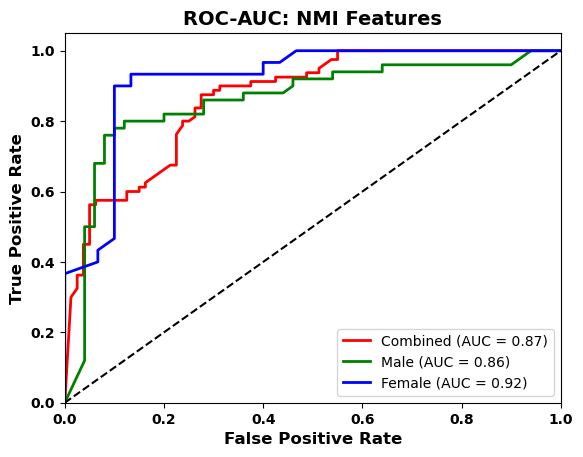

In [25]:
# First DataFrame
dataset1 = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X1 = dataset1.iloc[:, 1:].values
y1 = dataset1.iloc[:, 0].values
classifier1 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob1 = cross_val_predict(classifier1, X1, y1, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr1, tpr1, thresholds1 = roc_curve(y1, y_prob1[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc1 = auc(fpr1, tpr1)

# Second DataFrame
dataset2 = df2.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X2 = dataset2.iloc[:, 1:].values
y2 = dataset2.iloc[:, 0].values
classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob2 = cross_val_predict(classifier2, X2, y2, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr2, tpr2, thresholds2 = roc_curve(y2, y_prob2[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc2 = auc(fpr2, tpr2)

# Third DataFrame
dataset3 = df3.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X3 = dataset3.iloc[:, 1:].values
y3 = dataset3.iloc[:, 0].values
classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob3 = cross_val_predict(classifier3, X3, y3, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr3, tpr3, thresholds3 = roc_curve(y3, y_prob3[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curves for all three dataframes in a single plot
plt.plot(fpr1, tpr1, color='r', lw=2, label='Combined (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='Male (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='Female (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: NMI Features', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI_All3.svg')
plt.savefig('ROC_AUC_NMI_All3.pdf')

# Show the plot
plt.show()

In [26]:
# First DataFrame
tn1, fp1, fn1, tp1 = confusion_matrix(y1, np.argmax(y_prob1, axis=1)).ravel()
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
balanced_accuracy1 = (sensitivity1 + specificity1) / 2

#Second DataFrame
tn2, fp2, fn2, tp2 = confusion_matrix(y2, np.argmax(y_prob2, axis=1)).ravel()
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)
balanced_accuracy2 = (sensitivity2 + specificity2) / 2

#Third DataFrame
tn3, fp3, fn3, tp3 = confusion_matrix(y3, np.argmax(y_prob3, axis=1)).ravel()
sensitivity3 = tp3 / (tp3 + fn3)
specificity3 = tn3 / (tn3 + fp3)
balanced_accuracy3 = (sensitivity3 + specificity3) / 2

data = {
    'Combined': [sensitivity1, specificity1, balanced_accuracy1],
    'Male': [sensitivity2, specificity2, balanced_accuracy2],
    'Female': [sensitivity3, specificity3, balanced_accuracy3]
}
results_df = pd.DataFrame(data, index=['Sensitivity', 'Specificity', 'Balanced Accuracy'])

results_df.to_csv('Table_NMI_All3.csv')
results_df.head()

,Combined,Male,Female
Sensitivity,0.7875,0.8,0.933333
Specificity,0.7625,0.8,0.866667
Balanced Accuracy,0.7750,0.8,0.900000


## Common Features

In [27]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251
df1 = pd.read_csv('Any2Common_inAll45Feats_Data.csv')
df1 = df1.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251
(251, 10)


,APPRDX,MDS_Apathy,MDSP_Fatigue,Montreal_Cognitive,REM_Dream,SCOPA_Gastro,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,1,0,2,1,1,2,1,2
1,0,1,1,0,2,0,1,0,0,2


In [28]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male
df2 = pd.read_csv('Any2Common_inAll45Feats_Data_Male.csv')
df2 = df2.drop(['PATNO'], axis=1)
df2['APPRDX'] = df2['APPRDX'] -1
print(df2.shape)
df2.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male
(167, 12)


,APPRDX,MDS_Apathy,MDS_Depress,MDSP_Fatigue,MDSP_SleepDay,Montreal_Cognitive,REM_Dream,SCOPA_Sex,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,1,0,1,1,0,2,0,1,0,0,2
1,0,0,0,0,1,0,0,0,1,1,1,0


In [29]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female
df3 = pd.read_csv('Any2Common_inAll45Feats_Data_Female.csv')
df3 = df3.drop(['PATNO'], axis=1)
df3['APPRDX'] = df3['APPRDX'] -1
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female
(84, 6)


,APPRDX,MDSP_Constipate,MDSP_Pain,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,0,1,1,0,1,2
1,0,0,1,0,1,1


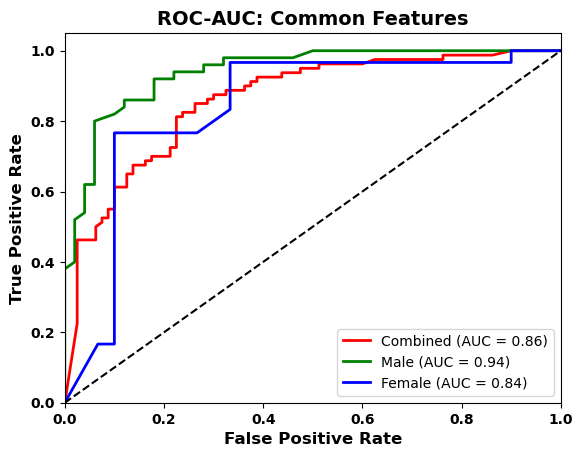

In [36]:
# First DataFrame
dataset1 = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X1 = dataset1.iloc[:, 1:].values
y1 = dataset1.iloc[:, 0].values
classifier1 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob1 = cross_val_predict(classifier1, X1, y1, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr1, tpr1, thresholds1 = roc_curve(y1, y_prob1[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc1 = auc(fpr1, tpr1)

# Second DataFrame
dataset2 = df2.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X2 = dataset2.iloc[:, 1:].values
y2 = dataset2.iloc[:, 0].values
classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob2 = cross_val_predict(classifier2, X2, y2, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr2, tpr2, thresholds2 = roc_curve(y2, y_prob2[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc2 = auc(fpr2, tpr2)

# Third DataFrame
dataset3 = df3.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X3 = dataset3.iloc[:, 1:].values
y3 = dataset3.iloc[:, 0].values
classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob3 = cross_val_predict(classifier3, X3, y3, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr3, tpr3, thresholds3 = roc_curve(y3, y_prob3[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curves for all three dataframes in a single plot
plt.plot(fpr1, tpr1, color='r', lw=2, label='Combined (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='Male (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='Female (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: Common Features', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Combined_All3.svg')
plt.savefig('ROC_AUC_Combined_All3.pdf')

# Show the plot
plt.show()

In [31]:
# First DataFrame
tn1, fp1, fn1, tp1 = confusion_matrix(y1, np.argmax(y_prob1, axis=1)).ravel()
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
balanced_accuracy1 = (sensitivity1 + specificity1) / 2

#Second DataFrame
tn2, fp2, fn2, tp2 = confusion_matrix(y2, np.argmax(y_prob2, axis=1)).ravel()
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)
balanced_accuracy2 = (sensitivity2 + specificity2) / 2

#Third DataFrame
tn3, fp3, fn3, tp3 = confusion_matrix(y3, np.argmax(y_prob3, axis=1)).ravel()
sensitivity3 = tp3 / (tp3 + fn3)
specificity3 = tn3 / (tn3 + fp3)
balanced_accuracy3 = (sensitivity3 + specificity3) / 2

data = {
    'Combined': [sensitivity1, specificity1, balanced_accuracy1],
    'Male': [sensitivity2, specificity2, balanced_accuracy2],
    'Female': [sensitivity3, specificity3, balanced_accuracy3]
}
results_df = pd.DataFrame(data, index=['Sensitivity', 'Specificity', 'Balanced Accuracy'])

results_df.to_csv('Table_CommonFeat_All3.csv')
results_df.head()

,Combined,Male,Female
Sensitivity,0.73750,0.92,0.766667
Specificity,0.77500,0.86,0.766667
Balanced Accuracy,0.75625,0.89,0.766667
